<h1 style="color:red">Import data from mongo</h1>

In [123]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))
numberOfMovies = 38
numberOfFeatures = 14

In [124]:
del data['_id']
data.head(numberOfMovies)

,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query,query_length,retweets,theater_count,tweets
0,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,#TheAccountant,13,10957,3332.0,16708
1,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,#MaxSteel,8,1301,2034.0,1781
2,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,#KevinHartWhatNow,16,14787,2567.0,18045
3,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,#PricelessTheMovie,17,511,303.0,975
4,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,#MadeaHalloween,14,9847,2260.0,12710
5,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,#JackReacherMovie,16,8783,3780.0,10032
6,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,#OuijaMovie,10,12413,3167.0,29983
7,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,#KeepingUpWithTheJoneses,23,2638,3022.0,3882
8,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,#InfernoMovie,12,7215,3576.0,9444
9,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,#GimmeDanger,11,759,3.0,944


<h1 style="color:blue">Make table readable</h1>

In [125]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
#punctuation = data['punctuation']
#data.drop(labels=['punctuation'], axis=1, inplace=True)
#data.insert(4, 'punctuation', punctuation)
data.head(numberOfMovies)

,query,tweets,retweets,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count
0,#TheAccountant,16708,10957,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0
1,#MaxSteel,1781,1301,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0
2,#KevinHartWhatNow,18045,14787,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0
3,#PricelessTheMovie,975,511,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0
4,#MadeaHalloween,12710,9847,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0
5,#JackReacherMovie,10032,8783,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0
6,#OuijaMovie,29983,12413,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0
7,#KeepingUpWithTheJoneses,3882,2638,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0
8,#InfernoMovie,9444,7215,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0
9,#GimmeDanger,944,759,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0


In [126]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(numberOfFeatures, 'gross', gross)
data.head(numberOfMovies)

,query,tweets,retweets,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,theater_count
0,#TheAccountant,16708,10957,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,3332.0
1,#MaxSteel,1781,1301,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,2034.0
2,#KevinHartWhatNow,18045,14787,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,2567.0
3,#PricelessTheMovie,975,511,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,303.0
4,#MadeaHalloween,12710,9847,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,2260.0
5,#JackReacherMovie,10032,8783,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,3780.0
6,#OuijaMovie,29983,12413,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,3167.0
7,#KeepingUpWithTheJoneses,3882,2638,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,3022.0
8,#InfernoMovie,9444,7215,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,3576.0
9,#GimmeDanger,944,759,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,3.0


In [127]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(numberOfMovies)

,query,tweets,retweets,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,theater_count,grossPerDay
0,#TheAccountant,16708,10957,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,3332.0,8.236758e+06
1,#MaxSteel,1781,1301,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,2034.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,2567.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,303.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,2260.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,3780.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,3167.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,3022.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,3576.0,4.953475e+06
9,#GimmeDanger,944,759,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,3.0,1.490833e+04


<h2>Plotting</h2>

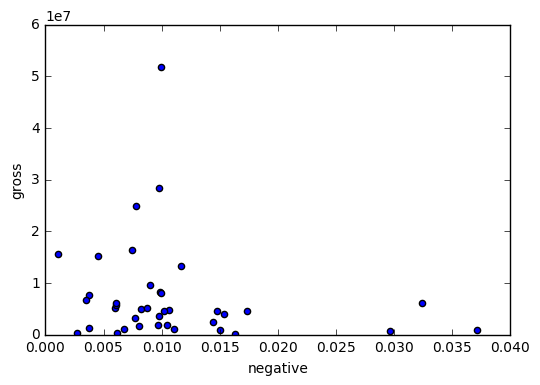

In [128]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

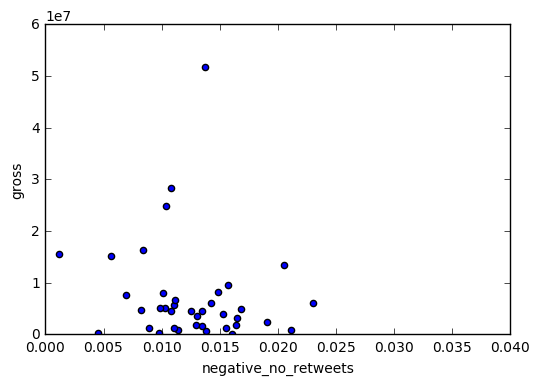

In [129]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

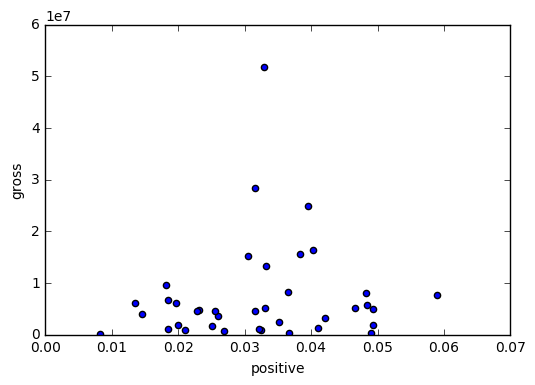

In [130]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive'], data['grossPerDay'])
plt.show()

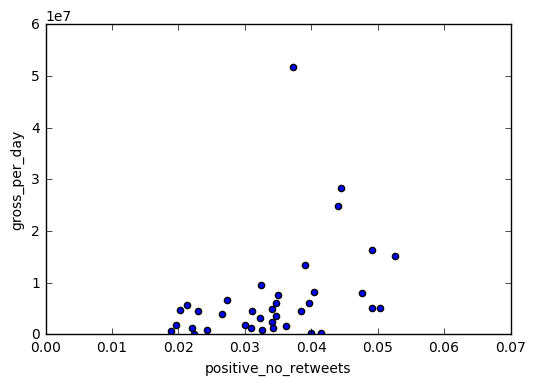

In [131]:
plt.ylabel('gross_per_day')
plt.xlabel('positive_no_retweets')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

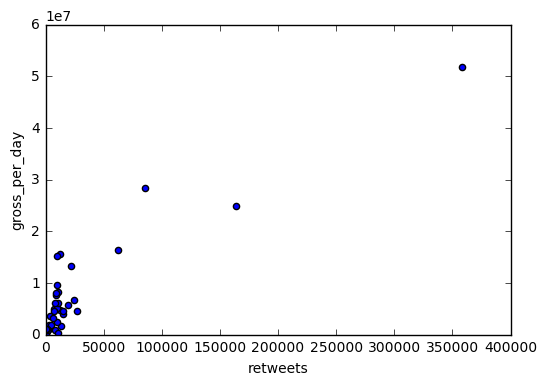

In [132]:
plt.ylabel('gross_per_day')
plt.xlabel('retweets')
plt.axis([0, 400000, 0, 60000000])
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

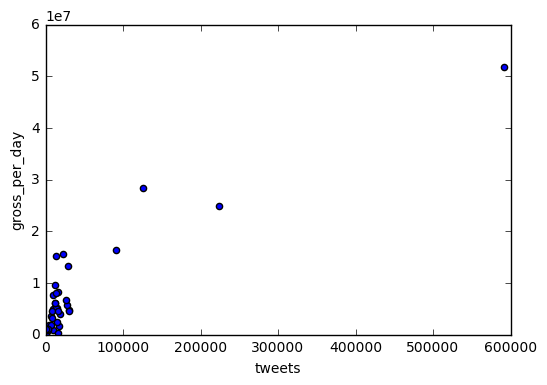

In [133]:
plt.ylabel('gross_per_day')
plt.xlabel('tweets')
plt.axis([0, 600000, 0, 60000000])
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [134]:
data['percentretweets'] = data.retweets/data.tweets
data.head(numberOfMovies)

,query,tweets,retweets,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,theater_count,grossPerDay,percentretweets
0,#TheAccountant,16708,10957,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,3332.0,8.236758e+06,0.655794
1,#MaxSteel,1781,1301,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,2034.0,7.274053e+05,0.730488
2,#KevinHartWhatNow,18045,14787,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,2567.0,3.922403e+06,0.819451
3,#PricelessTheMovie,975,511,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,303.0,2.356737e+05,0.524103
4,#MadeaHalloween,12710,9847,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,2260.0,9.500483e+06,0.774744
5,#JackReacherMovie,10032,8783,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,3780.0,7.624163e+06,0.875498
6,#OuijaMovie,29983,12413,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,3167.0,4.688500e+06,0.414001
7,#KeepingUpWithTheJoneses,3882,2638,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,3022.0,1.820492e+06,0.679547
8,#InfernoMovie,9444,7215,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,3576.0,4.953475e+06,0.763977
9,#GimmeDanger,944,759,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,3.0,1.490833e+04,0.804025


In [135]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
del data['daysInTheater']
data.head(numberOfMovies)

,query,tweets,retweets,percentretweets,capital,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,theater_count,grossPerDay
0,#TheAccountant,16708,10957,0.655794,0.119949,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,3332.0,8.236758e+06
1,#MaxSteel,1781,1301,0.730488,0.152754,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,2034.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,0.146663,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,2567.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.524103,0.115891,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,303.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.774744,0.137538,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,2260.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.875498,0.144194,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,3780.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,0.123995,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,3167.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,0.153027,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,3022.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,0.116394,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,3576.0,4.953475e+06
9,#GimmeDanger,944,759,0.804025,0.151591,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,3.0,1.490833e+04


In [136]:
del data['query']

<h1 style="color:red">Add Complexity</h1>

In [151]:
data['square_positive'] = data.positive**2
data['square_negative'] = data.negative**2
data['square_positive_no_retweets'] = data.positive_no_retweets**2
data['square_negative_no_retweets'] = data.negative_no_retweets**2
data['square_percentretweets'] = data.percentretweets**2
data['square_capital'] = data.capital**2
data['square_punctuation'] = data.punctuation**2
data['square_emoji_count'] = data.emoji_count**2
data['square_favorites_per_tweet'] = data.favorites_per_tweet**2
data['ab'] = data.tweets*data.retweets
data['ac'] = data.tweets*data.capital
data['ad'] = data.tweets*data.emoji_count
data['ae'] = data.tweets*data.favorites_per_tweet
data['af'] = data.tweets*data.negative
data['ag'] = data.tweets*data.negative_no_retweets
data['ah'] = data.tweets*data.positive
data['ai'] = data.tweets*data.positive_no_retweets
data['aj'] = data.tweets*data.punctuation
data['bc'] = data.retweets*data.capital
data['bd'] = data.retweets*data.emoji_count
data['be'] = data.retweets*data.favorites_per_tweet
data['bf'] = data.retweets*data.negative
data['bg'] = data.retweets*data.negative_no_retweets
data['bh'] = data.retweets*data.positive
data['bi'] = data.retweets*data.positive_no_retweets
data['bj'] = data.retweets*data.punctuation
data['cd'] = data.capital*data.emoji_count
data['ce'] = data.capital*data.favorites_per_tweet
data['cf'] = data.capital*data.negative
data['cg'] = data.capital*data.negative_no_retweets
data['ch'] = data.capital*data.positive
data['ci'] = data.capital*data.positive_no_retweets
data['cj'] = data.capital*data.punctuation
data['de'] = data.emoji_count*data.favorites_per_tweet
data['df'] = data.emoji_count*data.negative
data['dg'] = data.emoji_count*data.negative_no_retweets
data['dh'] = data.emoji_count*data.positive
data['di'] = data.emoji_count*data.positive_no_retweets
data['dj'] = data.emoji_count*data.punctuation
data['ef'] = data.favorites_per_tweet*data.negative
data['eg'] = data.favorites_per_tweet*data.negative_no_retweets
data['eh'] = data.favorites_per_tweet*data.positive
data['ei'] = data.favorites_per_tweet*data.positive_no_retweets
data['ej'] = data.favorites_per_tweet*data.punctuation
data['fg'] = data.negative*data.negative_no_retweets
data['fh'] = data.negative*data.positive
data['fi'] = data.negative*data.positive_no_retweets
data['fj'] = data.negative*data.punctuation
data['gh'] = data.negative_no_retweets*data.positive
data['gi'] = data.negative_no_retweets*data.positive_no_retweets
data['gj'] = data.negative_no_retweets*data.punctuation
data['hi'] = data.positive*data.positive_no_retweets
data['hj'] = data.positive*data.punctuation
data['ij'] = data.positive_no_retweets*data.punctuation
data['ak'] = data.tweets*data.theater_count
data['bk'] = data.retweets*data.theater_count
data['ck'] = data.capital*data.theater_count
data['dk'] = data.emoji_count*data.theater_count
data['ek'] = data.favorites_per_tweet*data.theater_count
data['fk'] = data.negative*data.theater_count
data['gk'] = data.negative_no_retweets*data.theater_count
data['hk'] = data.positive*data.theater_count
data['ik'] = data.positive_no_retweets*data.theater_count
data.head(numberOfMovies)

,tweets,retweets,percentretweets,capital,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,...,grossByCategory,ak,bk,ck,dk,ek,fk,gk,hk,ik
0,16708,10957,0.655794,0.119949,0.002353,1.845403,0,0.009873,0.014885,0.036564,...,2,5.567106e+07,3.650872e+07,399.670594,7.840478,6148.884127,32.897020,49.597295,121.831888,134.919076
1,1781,1301,0.730488,0.152754,0.002137,0.810219,0,0.029627,0.013817,0.026907,...,0,3.622554e+06,2.646234e+06,310.701180,4.346717,1647.985401,60.261300,28.103105,54.729115,38.377358
2,18045,14787,0.819451,0.146663,0.005497,2.458964,0,0.015356,0.015272,0.014558,...,2,4.632152e+07,3.795823e+07,376.484464,14.109577,6312.159823,39.418799,39.204212,37.371070,68.199623
3,975,511,0.524103,0.115891,0.004280,2.591795,1,0.002734,0.004493,0.049037,...,0,2.954250e+05,1.548330e+05,35.115097,1.296719,785.313846,0.828459,1.361304,14.858238,12.559130
4,12710,9847,0.774744,0.137538,0.024375,2.371755,0,0.008981,0.015667,0.018103,...,2,2.872460e+07,2.225422e+07,310.835677,55.087532,5360.165224,20.295953,35.408520,40.913569,73.333679
5,10032,8783,0.875498,0.144194,0.004524,2.181918,1,0.003757,0.006916,0.058994,...,2,3.792096e+07,3.319974e+07,545.054446,17.098977,8247.649522,14.203182,26.141375,222.999155,132.206791
6,29983,12413,0.414001,0.123995,0.007021,0.787846,1,0.010599,0.008265,0.023189,...,2,9.495616e+07,3.931197e+07,392.692561,22.235177,2495.109695,33.566640,26.174437,73.440634,64.024351
7,3882,2638,0.679547,0.153027,0.002289,2.365276,0,0.010492,0.012986,0.019934,...,1,1.173140e+07,7.972036e+06,462.448780,6.917530,7147.862957,31.705347,39.244594,60.240160,59.365762
8,9444,7215,0.763977,0.116394,0.001504,1.616158,1,0.008232,0.016870,0.049257,...,2,3.377174e+07,2.580084e+07,416.224655,5.378698,5779.382465,29.436903,60.327836,176.141923,121.668639
9,944,759,0.804025,0.151591,0.000219,1.344280,0,0.016290,0.016057,0.008255,...,0,2.832000e+03,2.277000e+03,0.454772,0.000656,4.032839,0.048871,0.048170,0.024764,0.067214


<h1 style="color:orange">Sklearn Stuff</h1>

<h1 style="color:red">Linear Regression</h1>

In [166]:
total_data = data.values
f_col = ['tweets', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'be', 'bf', 'bi', 'ak', 'bk', 'dk', 'gk', 'ik']
X = data[f_col]
y = data[['grossPerDay']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
scaled_X = preprocessing.scale(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=0)
#X_train = scaled_X
#y_train = y
#X_test = scaled_X
#y_test = y
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print (clf.intercept_)
print (clf.coef_)

[ 7361165.66545144]
[[  3.44321297e+07  -2.22227824e+07  -2.55219905e+07  -1.59655834e+07
    1.61963328e+08  -2.31204787e+07   2.32324061e+07  -1.48874816e+07
   -7.78674346e+07   1.31421336e+07  -1.39008059e+08   1.92352686e+07
    5.59036568e+07  -2.65457084e+07   4.35080895e+07   3.17341998e+06
   -2.02210375e+06   2.87028948e+06]]


In [167]:
import numpy as np
np.sqrt(((y_test-y_pred)**2).mean())

grossPerDay    2.082943e+06
dtype: float64

<h1 style="color:red">Logistic Regression</h1>

In [140]:
def split_gross_categories(value):
    if value < 1000000:
        return 0
    elif value < 3000000:
        return 1
    elif value < 10000000:
        return 2
    else:
        return 3

data['grossByCategory'] = 0

f=lambda x: split_gross_categories(x)
data.grossByCategory = data.grossPerDay.map(f)
data.head(numberOfMovies)

,tweets,retweets,percentretweets,capital,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,...,fh,fi,fj,gh,gi,gj,hi,hj,ij,grossByCategory
0,16708,10957,0.655794,0.119949,0.002353,1.845403,0,0.009873,0.014885,0.036564,...,0.000361,0.000400,0.000240,0.000544,0.000603,0.000362,0.001481,0.000889,0.000984,2
1,1781,1301,0.730488,0.152754,0.002137,0.810219,0,0.029627,0.013817,0.026907,...,0.000797,0.000559,0.000694,0.000372,0.000261,0.000324,0.000508,0.000630,0.000442,0
2,18045,14787,0.819451,0.146663,0.005497,2.458964,0,0.015356,0.015272,0.014558,...,0.000224,0.000408,0.000446,0.000222,0.000406,0.000443,0.000387,0.000423,0.000771,2
3,975,511,0.524103,0.115891,0.004280,2.591795,1,0.002734,0.004493,0.049037,...,0.000134,0.000113,0.000066,0.000220,0.000186,0.000109,0.002033,0.001192,0.001007,0
4,12710,9847,0.774744,0.137538,0.024375,2.371755,0,0.008981,0.015667,0.018103,...,0.000163,0.000291,0.000208,0.000284,0.000508,0.000363,0.000587,0.000420,0.000752,2
5,10032,8783,0.875498,0.144194,0.004524,2.181918,1,0.003757,0.006916,0.058994,...,0.000222,0.000131,0.000084,0.000408,0.000242,0.000155,0.002063,0.001323,0.000784,2
6,29983,12413,0.414001,0.123995,0.007021,0.787846,1,0.010599,0.008265,0.023189,...,0.000246,0.000214,0.000236,0.000192,0.000167,0.000184,0.000469,0.000517,0.000450,2
7,3882,2638,0.679547,0.153027,0.002289,2.365276,0,0.010492,0.012986,0.019934,...,0.000209,0.000206,0.000215,0.000259,0.000255,0.000266,0.000392,0.000408,0.000402,1
8,9444,7215,0.763977,0.116394,0.001504,1.616158,1,0.008232,0.016870,0.049257,...,0.000405,0.000280,0.000172,0.000831,0.000574,0.000352,0.001676,0.001027,0.000709,2
9,944,759,0.804025,0.151591,0.000219,1.344280,0,0.016290,0.016057,0.008255,...,0.000134,0.000365,0.000334,0.000133,0.000360,0.000329,0.000185,0.000169,0.000459,0


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
f_col = ['tweets', 'positive', 'negative']
X = data[f_col]
y = data[['grossByCategory']]
scaled_X = preprocessing.scale(X)
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
clf.fit(X_train, y_train)
output = clf.predict(X_test)
print metrics.accuracy_score(y_test, output)

0.75


C:\Users\Steve Shim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
clf.predict(X_test)

array([2, 2, 2, 3], dtype=int64)

In [143]:
y_test

,grossByCategory
9,0
0,2
31,2
12,3


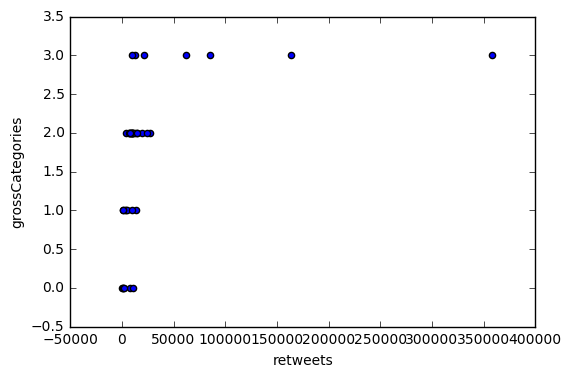

In [144]:
plt.ylabel('grossCategories')
plt.xlabel('retweets')
plt.scatter(data['retweets'], data['grossByCategory'])
plt.show()

<h1 style="color:red">Cross Validation</h1>

In [145]:
from sklearn.cross_validation import cross_val_score
X=data[f_col]
print (X.shape)
y=data['gross']
print (y.shape)

(38, 3)
(38L,)


In [146]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, scaled_X, y, cv=21, scoring='mean_squared_error')
print(mse_list)

[ -1.49898866e+13  -2.40700315e+14  -5.45601148e+13  -1.09491112e+14
  -8.92791613e+13  -2.39590847e+14  -8.86265678e+14  -3.31153620e+13
  -2.43530663e+14  -9.52685794e+14  -4.38310783e+13  -2.48994614e+14
  -4.27030263e+15  -1.62143348e+15  -7.41667507e+12  -6.15301687e+13
  -1.88425572e+14  -1.52061180e+14  -3.08337691e+14  -2.89545043e+12
  -2.22990050e+14]


In [147]:
mse_list_positive = -mse_list

In [148]:
import numpy as np
rmse_list = np.sqrt(mse_list_positive)
print rmse_list

[  3871677.49089791  15514519.48353756   7386481.8983219   10463800.05896762
   9448765.06664259  15478722.39965897  29770214.60829564
   5754594.86277564  15605469.00284534  30865608.59206601
   6620504.38330103  15779563.17300249  65347552.57316119
  40267027.23732679   2723357.31617579   7844116.81814152
  13726819.43071081  12331308.95232074  17559547.0154144    1701602.31242422
  14932851.36127306]


In [149]:
print (rmse_list.mean())

16333052.5732
